In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values to [0, 1]
train_features = train_features / 255.0
test_features = test_features / 255.0

In [ ]:
# Verify label shape and convert from one-hot to integer if necessary
if len(train_labels.shape) > 1:  # Check if labels are one-hot encoded
    train_labels = np.argmax(train_labels, axis=1)
    test_labels = np.argmax(test_labels, axis=1)

In [ ]:
# Confirm label format
print("Train labels shape:", train_labels.shape)  # Should be (60000,)
print("Test labels shape:", test_labels.shape)    # Should be (10000,)
print("Sample train label:", train_labels[0])     # Should be an integer (0-9)

Train labels shape: (60000,)
Test labels shape: (10000,)
Sample train label: 5


In [ ]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Use 'accuracy' for simplicity

In [ ]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
hist = model.fit(train_features, train_labels, epochs=100, batch_size=256,
                 validation_data=(test_features, test_labels))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7943 - loss: 0.7424 - val_accuracy: 0.9405 - val_loss: 0.2007
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9473 - loss: 0.1815 - val_accuracy: 0.9619 - val_loss: 0.1272
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9662 - loss: 0.1160 - val_accuracy: 0.9683 - val_loss: 0.1041
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0895 - val_accuracy: 0.9719 - val_loss: 0.0892
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0669 - val_accuracy: 0.9730 - val_loss: 0.0847
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0543 - val_accuracy: 0.9777 - val_loss: 0.0746
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9875 - loss: 0.0440 - val_accuracy: 0.9728 - val_loss: 0.0848
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0380 - val_acc

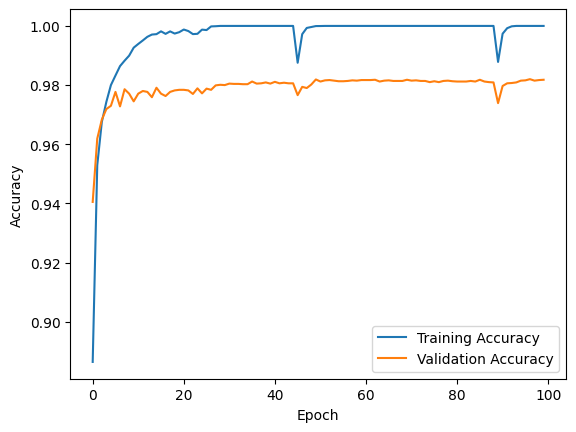

In [ ]:
# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()